In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Ingestion and Analysing Basic Structure 

In [3]:
df = pd.read_csv("./Data/bank_marketing_part1_Data.csv")

In [4]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df[df.duplicated()]  # no duplicate values also

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


- We can see there are no null values, so there is no need of doing null value treatment. 
- The data quality is also good, so we can directly jump to EDA.

# 2. Exploratory Data Analysis

## 2.1 Summary Statistics

In [7]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


## 2.2 Univariate Data Analysis

- Let's analyse the distribution of all the 7 features.

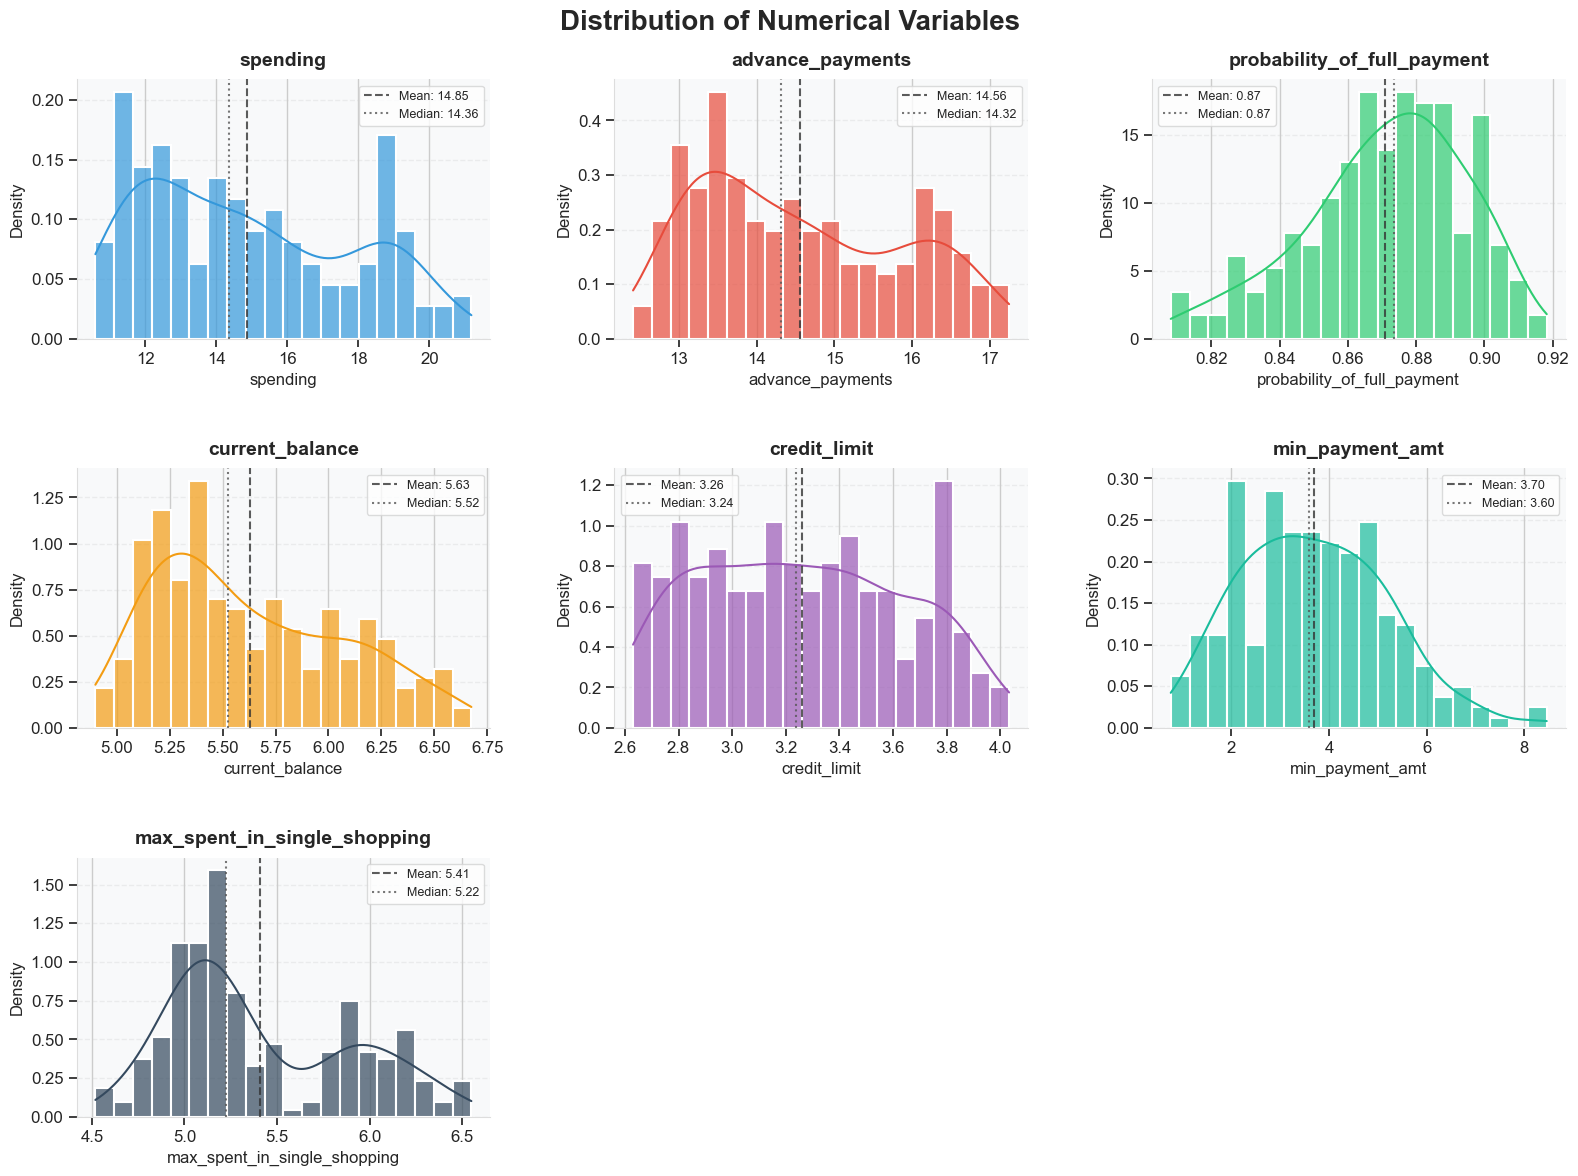

In [8]:
import matplotlib.gridspec as gridspec

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)

# Get number of numerical columns
num_cols = len(df.columns)

# Calculate optimal grid layout
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(num_cols / n_cols))  # Number of rows needed

# Create figure
fig = plt.figure(figsize=(16, 4 * n_rows))

# Create GridSpec
gs = gridspec.GridSpec(n_rows, n_cols, figure=fig)

# Create a modern, visually appealing color palette
colors = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6", "#1abc9c", "#34495e"]

# Function to style each histogram
def style_histogram(ax, data, column_name, color):
    # Create histogram with KDE
    sns.histplot(
        data=data,
        kde=True,
        ax=ax,
        color=color,
        alpha=0.7,
        edgecolor='white',
        linewidth=1.5,
        stat='density',
        bins=20
    )
    
    # Add a vertical line for the mean
    mean_val = data.mean()
    ax.axvline(
        x=mean_val, 
        color='#333333', 
        linestyle='--', 
        linewidth=1.5,
        alpha=0.8,
        label=f'Mean: {mean_val:.2f}'
    )
    
    # Add a vertical line for the median
    median_val = data.median()
    ax.axvline(
        x=median_val, 
        color='#555555', 
        linestyle=':', 
        linewidth=1.5,
        alpha=0.8,
        label=f'Median: {median_val:.2f}'
    )
    
    # Style the plot
    ax.set_title(column_name, fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel(column_name, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    
    # Add a legend
    ax.legend(frameon=True, facecolor='white', edgecolor='lightgray', fontsize=9)
    
    # Remove top and right spines
    sns.despine(ax=ax)
    
    # Improve grid appearance
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)
    
    # Set background color
    ax.set_facecolor('#f8f9fa')

# Get columns
numerical_columns = df.columns

# Create each histogram
for i, col in enumerate(numerical_columns):
    # Calculate position in grid
    row = i // n_cols
    col_pos = i % n_cols
    
    # Create subplot
    ax = fig.add_subplot(gs[row, col_pos])
    
    # Style the histogram
    style_histogram(ax, df[col], col, colors[i % len(colors)])

# Add main title
fig.suptitle('Distribution of Numerical Variables', fontsize=20, fontweight='bold', y=0.98)

# Add subtle border
for ax in fig.axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('#dddddd')
        spine.set_linewidth(0.8)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Show plot
plt.show()

- As here we can see that there are different type of ranges of the values of different features. And each of the features have different scales.
- In order to do better clustering, we need to have a fair distance metric, so we need to normalise the features here. 

### We can use either of these technique:
1. Standardization (Z-score scaling): Centers the data around 0 with a standard deviation of 1.

2. Normalization (Min-Max scaling): Scales values between 0 and 1.

## 2.3 Bivariate Data Analysis (Relationship between the variables)

- Let's create a correlation head matrix using seaborn to visualise the correlation coefficient values between columns

Text(0.5, 1.0, 'Correlation coefficient value of different columns')

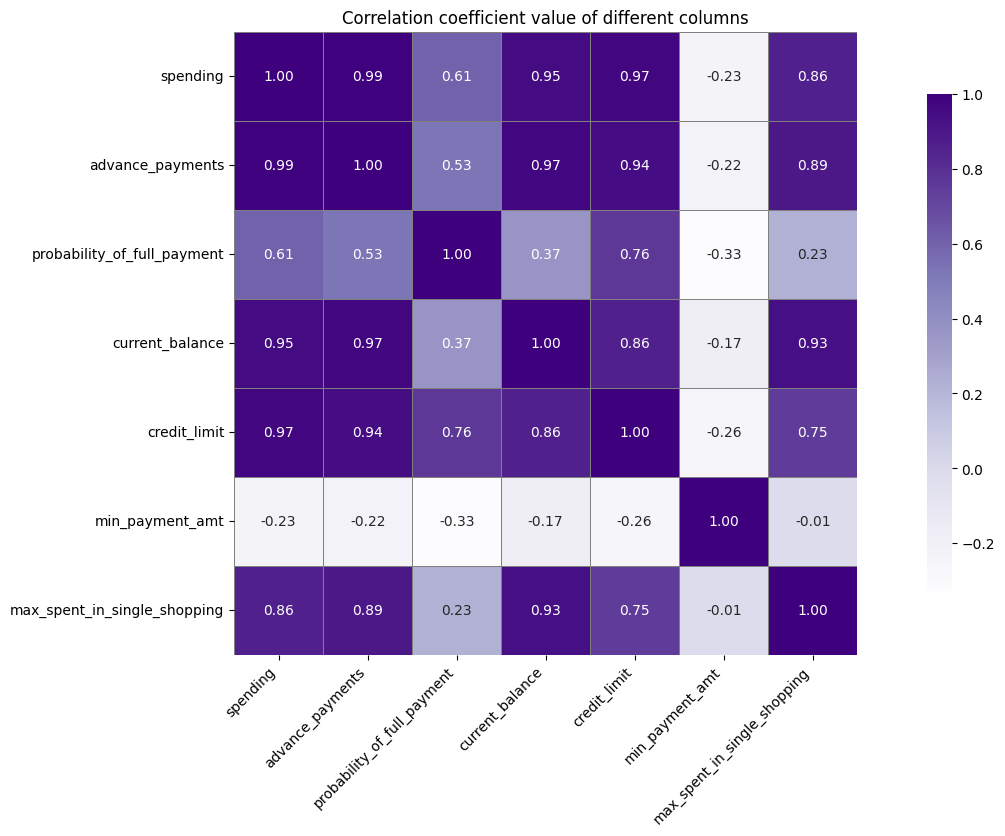

In [44]:
plt.style.use("default")
plt.figure(figsize = (14, 8))
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(
    corr_matrix,
    annot=True,               
    cmap="Purples",           
    annot_kws={"size": 10},   
    fmt=".2f",                
    linewidths=0.5,           
    linecolor="gray",         
    cbar_kws={"shrink": 0.8}, 
    square=True
)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.tight_layout(pad = 0.2)
plt.title("Correlation coefficient value of different columns")
 


We can observe following observation :

1. Highly Correlated Features (Multicollinearity):
    - spending & advance_payments (0.99)
        
    - spending & current_balance (0.95)
    - spending & credit_limit (0.97)
    - advance_payments & current_balance (0.97)
    - advance_payments & credit_limit (0.94)
    - current_balance & credit_limit (0.86)
    - current_balance & max_spent_in_single_shopping (0.93)

2. Moderate Correlation:

    - probability_of_full_payment & credit_limit (0.76)

    - probability_of_full_payment & spending (0.60)

3. Weak or No Correlation:

    - min_payment_amt has weak or negative correlations with other features.

C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

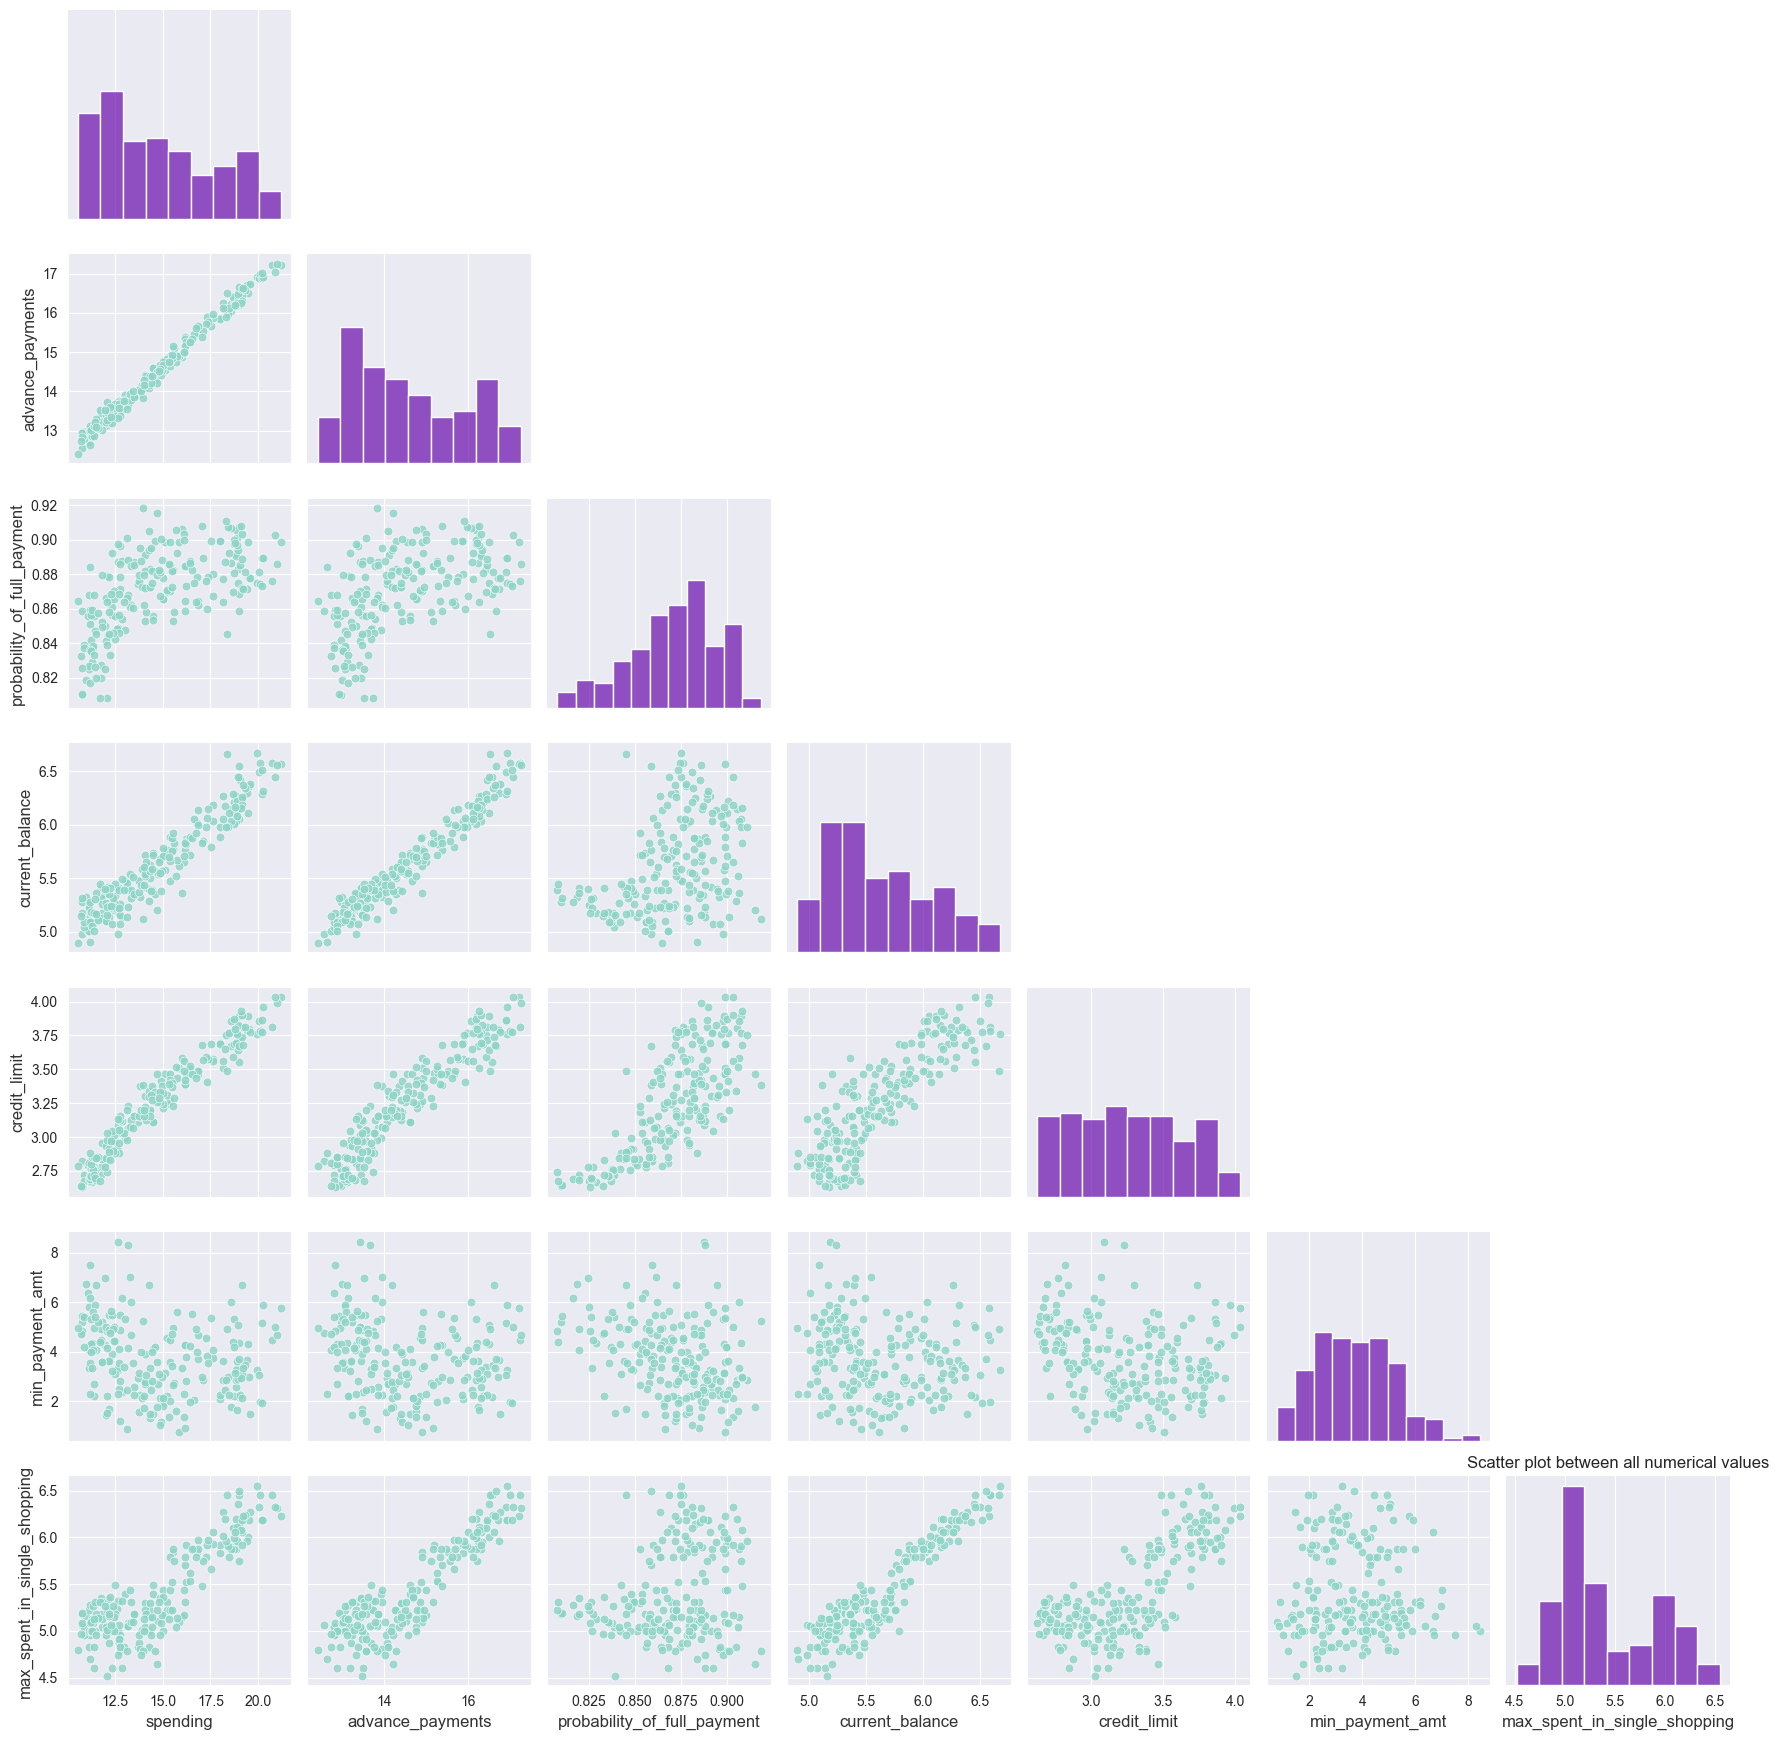

In [43]:
sns.set_style("darkgrid")  # Alternative: "whitegrid", "ticks"

custom_palette = "coolwarm"  # Other options: "viridis", "mako", "rocket"

# Create a pairplot with enhanced aesthetics
g = sns.pairplot(
    data=df,
    kind="scatter",
    palette=custom_palette,
    corner=True,  # Removes redundant upper triangle plots
    plot_kws={"s": 40, "edgecolor": "white", "alpha": 0.8},  # Customize scatter points
    diag_kws={"color": "#6A0DAD", "alpha": 0.7},  # Color for diagonal histograms
)

for ax in g.axes.flat:
    if ax:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight="medium", color="#333333")
        ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight="medium", color="#333333")

plt.title("Scatter plot between all numerical values")
# Adjust spacing
plt.tight_layout()
plt.show()

#### Impact on Clustering
1. Redundant Features: Since spending, advance_payments, current_balance, and credit_limit are highly correlated, they may introduce bias and cause clusters to be formed based on redundant information.

2. Over-Influence of Strongly Correlated Features: K-Means and other distance-based clustering methods give more weight to features with larger variance. Highly correlated features can dominate the clustering process, leading to misleading groupings.

3. Multicollinearity Issues: Clustering algorithms assume independent features. Highly correlated features can create misleading distance calculations.

#### How to solve?
 
- We'll use Feature Selection to solve this problem of highly multicollinearity. We'll see that in PreProcessing step

## 2.4 Outlier Detection

- We'll draw box plot to identify possible outliers in the data


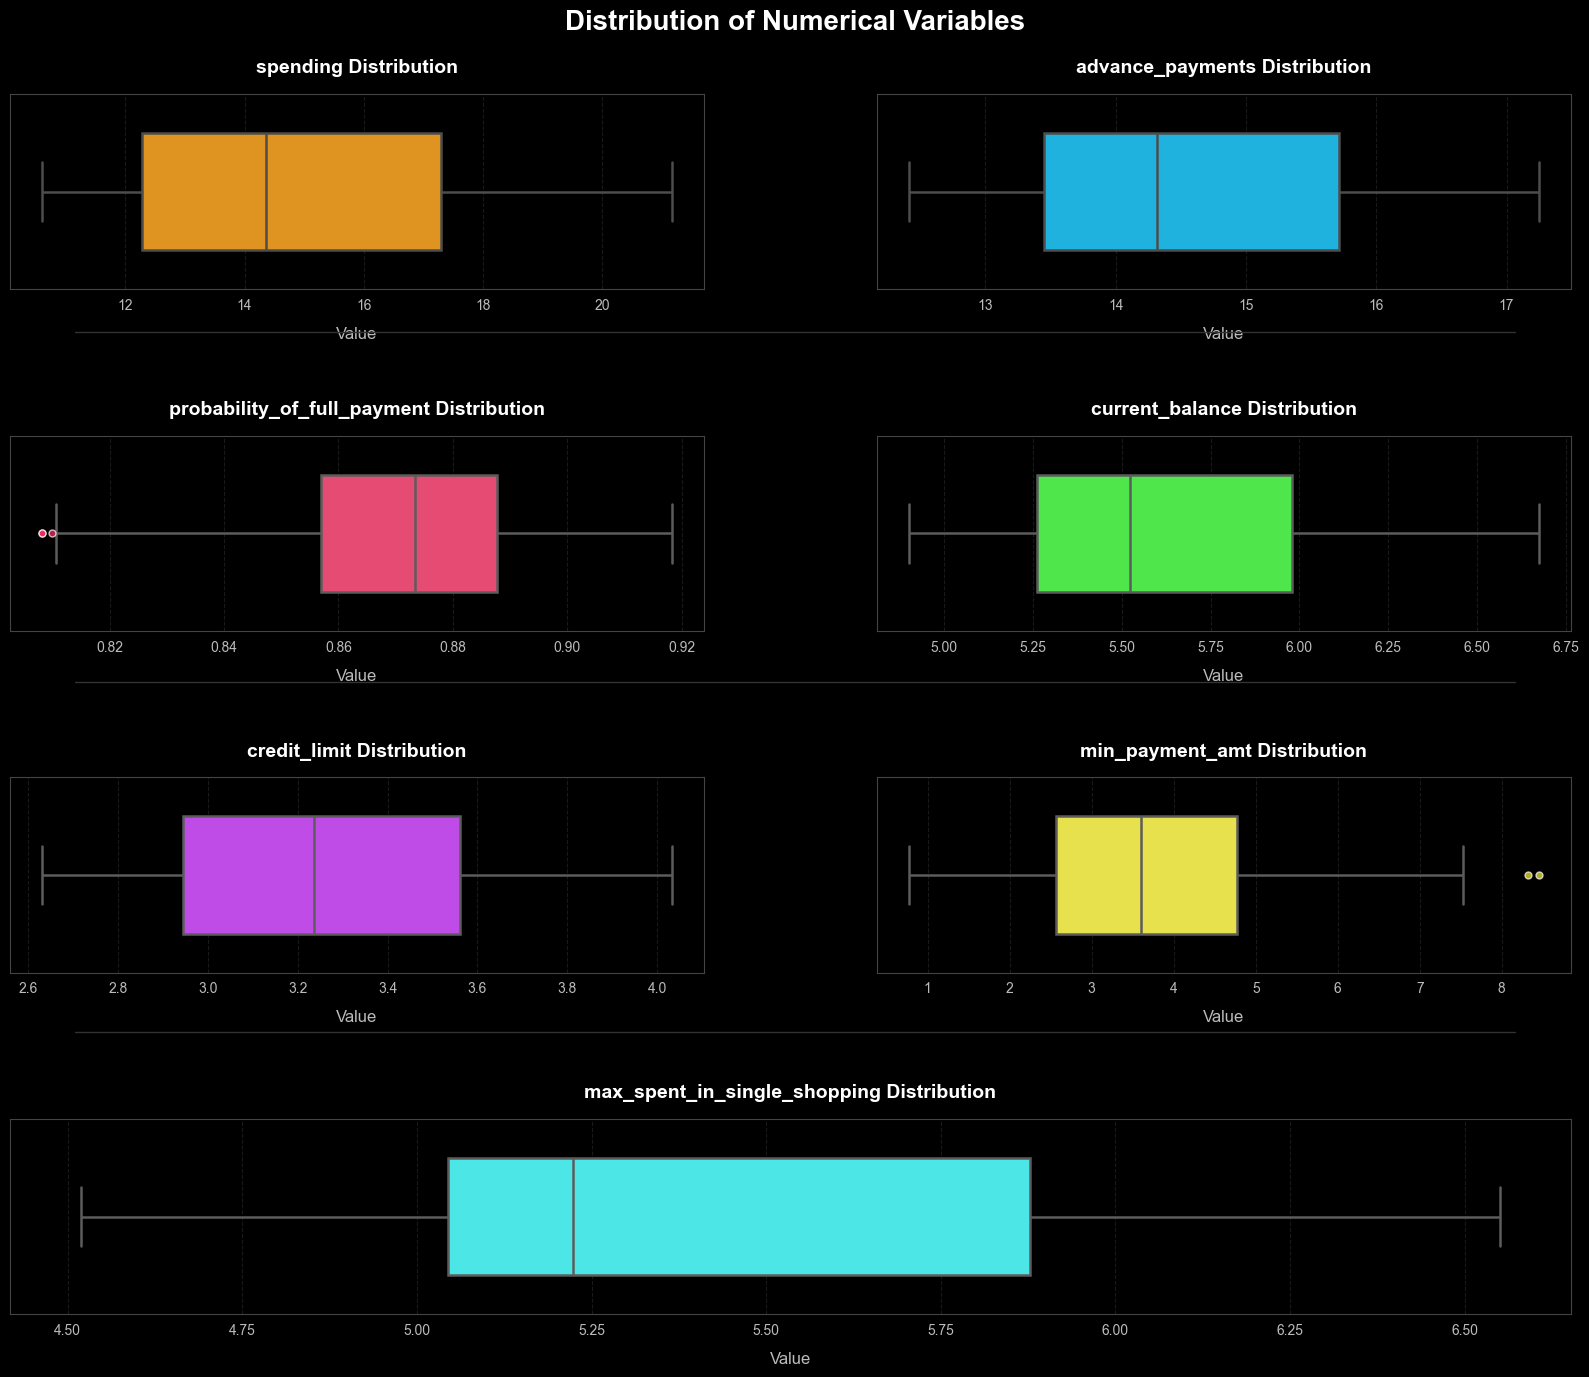

In [42]:


# Set the style
plt.style.use("dark_background")

# Create a color palette that works well with dark background
colors = ["#ff9a00", "#00c3ff", "#ff3366", "#36ff33", "#cc33ff", "#fff933", "#33ffff"]

# Create a figure with custom layout
fig = plt.figure(figsize=(16, 14))

# Use GridSpec for more control over layout
gs = gridspec.GridSpec(4, 2, figure=fig)

numerical_cols = df.columns
# Safely handle the 7 numerical columns
num_cols = len(numerical_cols)
col_index = 0

# Create a function to style each plot consistently
def style_boxplot(ax, data, title, color):
    # Create boxplot with custom styling
    sns.boxplot(
        x=data, 
        ax=ax, 
        orient='h',
        color=color,
        width=0.6,
        linewidth=1.8,
        fliersize=5,
        flierprops={'marker': 'o', 'markerfacecolor': color, 'markeredgecolor': '#ffffff', 'alpha': 0.7}
    )
    
    # Style the plot
    ax.set_title(f"{title} Distribution", fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel("Value", fontsize=12, labelpad=10)
    
    # Add a subtle grid
    ax.grid(axis='x', linestyle='--', alpha=0.3, color='#555555')
    ax.set_axisbelow(True)
    
    # Add a thin box around the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('#444444')
        spine.set_linewidth(0.8)
    
    # Style the text elements
    ax.tick_params(axis='x', colors='#bbbbbb')
    ax.tick_params(axis='y', colors='#bbbbbb')
    ax.title.set_color('#ffffff')
    ax.xaxis.label.set_color('#bbbbbb')

# Loop through the first 3 rows (6 plots if available)
for row in range(3):
    # Left plot
    if col_index < num_cols:
        ax_left = fig.add_subplot(gs[row, 0])
        style_boxplot(ax_left, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])
        col_index += 1
    
    # Right plot
    if col_index < num_cols:
        ax_right = fig.add_subplot(gs[row, 1])
        style_boxplot(ax_right, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])
        col_index += 1

# Special handling for the 7th plot (if it exists) - center it in bottom row
if col_index < num_cols:
    ax_bottom = fig.add_subplot(gs[3, :])
    style_boxplot(ax_bottom, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])

# Add an elegant title to the entire figure
fig.suptitle('Distribution of Numerical Variables', 
             fontsize=20, fontweight='bold', y=0.98, color='#ffffff')

# Add subtle dividing lines between rows
for row in range(1, 4):
    y_position = 1.0 - (row * 0.25)
    line = plt.Line2D([0.05, 0.95], [y_position, y_position], 
                     transform=fig.transFigure, figure=fig,
                     color='#333333', linestyle='-', linewidth=1)
    fig.add_artist(line)

# Adjust spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.75, wspace=0.25)

# Show the plot
plt.show()

- We can clearly see that only 2 columns contains outliers, min_payment_amt and probability_of_full_payment

In [29]:
outlier_columns = ["min_payment_amt", "probability_of_full_payment"]

- We'll treat outlier in Data Preprocessing step

# 3. Data Preprocessing

## 3.1 Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [ ]:
df.head(5)


In [ ]:
df_scaled.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [ ]:
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


## 3.2 Outlier Treatmant

In [45]:
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outlier only if there are error
    # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    # Outlier treatment
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])


In [46]:
for col in outlier_columns:
    treat_outliers(df, col)

## 3.3 Feature Selection

In [47]:
correlation_threshold = 0.9
high_corr_pairs = set()

# Find feature pairs with high correlation
corr_matrix = df_scaled.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            high_corr_pairs.add((corr_matrix.columns[j], corr_matrix.columns[i]))

In [48]:
high_corr_pairs

{('advance_payments', 'credit_limit'),
 ('advance_payments', 'current_balance'),
 ('current_balance', 'max_spent_in_single_shopping'),
 ('spending', 'advance_payments'),
 ('spending', 'credit_limit'),
 ('spending', 'current_balance')}

In [49]:
features_to_drop = ["credit_limit", "max_spent_in_single_shopping"]  # We should remove these two columns, because remvoing other columns will impact the data


In [50]:
df_scaled = df_scaled.drop(columns=features_to_drop)

In [51]:
df_scaled

,spending,advance_payments,probability_of_full_payment,current_balance,min_payment_amt
0,1.754355,1.811968,0.178230,2.367533,-0.298806
1,0.393582,0.253840,1.501773,-0.600744,-0.242805
2,1.413300,1.428192,0.504874,1.401485,-0.221471
3,-1.384034,-1.227533,-2.591878,-0.793049,0.987884
4,1.082581,0.998364,1.196340,0.591544,-1.088154
...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,0.190536
206,0.662292,0.814152,-0.305372,0.675253,0.813214
207,-0.281636,-0.306472,0.364883,-0.431064,-1.322158
208,0.438367,0.338271,1.230277,0.182048,-0.953484


# 4. Model Development

In [65]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


def evaluate_clustering_model(X, labels, show_detailed_report=True):
    """
    Comprehensive evaluation of a clustering model using multiple metrics.
    
    Parameters:
    -----------
    X : numpy array or pandas DataFrame
        The original feature matrix used for clustering
    labels : numpy array
        Cluster labels assigned by the clustering algorithm
    show_detailed_report : bool, optional (default=True)
        Whether to print a detailed evaluation report
    
    Returns:
    --------
    dict : A dictionary containing various clustering evaluation metrics
    """
    # Ensure input is a numpy array
    if isinstance(X, pd.DataFrame):
        X = X.values
        
    # Number of clusters
    n_clusters = len(np.unique(labels))
    
    # Compute evaluation metrics
    metrics = {
        'n_clusters': n_clusters,
        'silhouette_score': silhouette_score(X, labels)
    }
    
    # Cluster distribution
    cluster_sizes = np.bincount(labels)
    metrics['cluster_distribution'] = cluster_sizes
    
    # Detailed cluster information
    cluster_info = []
    for cluster in range(n_clusters):
        cluster_data = X[labels == cluster]
        cluster_info.append({
            'cluster': cluster,
            'size': len(cluster_data),
            'percentage': len(cluster_data) / len(X) * 100,
            'centroid': np.mean(cluster_data, axis=0)
        })
    metrics['cluster_details'] = cluster_info
    
    # Print detailed report if requested
    if show_detailed_report:
        print("Clustering Evaluation Report")
        print("-" * 30)
        print(f"Number of Clusters: {metrics['n_clusters']}")
        print("\nCluster Distribution:")
        for i, size in enumerate(cluster_sizes):
            print(f"Cluster {i}: {size} points ({size/len(X)*100:.2f}%)")
        
        print("\nMetrics:")
        print(f"Silhouette Score: {metrics['silhouette_score']:.4f}")
    
    return metrics

## 4.1 K-Mean clustering

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 42, n_init = 10)
labels = kmeans.fit_predict(df_scaled)

In [ ]:
silhouette_score(df_scaled, labels)

0.27921050414398263

- Here our score is very bad, so we need best value of k. For this we can manually find the value of k by plotting elbow graph. But we can achieve this task by using kneed library

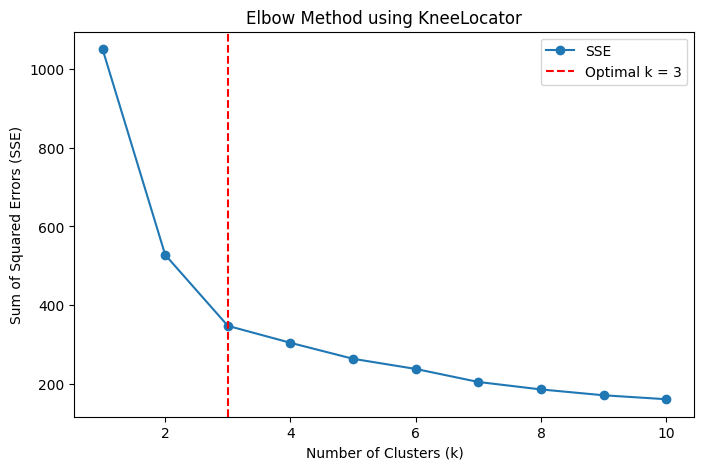

Optimal number of clusters: 3


In [ ]:
from kneed import KneeLocator 

# Compute Sum of Squared Errors (SSE) for different k values
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the nearest centroid

# Find the optimal k using KneeLocator
knee_locator = KneeLocator(k_values, sse, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

# Plot Elbow Method with Knee Point
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker="o", linestyle="-", label="SSE")
plt.axvline(optimal_k, color='r', linestyle="--", label=f"Optimal k = {optimal_k}")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method")
plt.legend()
plt.show()

print(f"Optimal number of clusters: {optimal_k}")

- Hence, $k=3$ is optimal value of k to be chosen

In [64]:
best_k_means_model = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = best_k_means_model.fit_predict(df_scaled)

In [67]:
x = evaluate_clustering_model(df_scaled, labels)

Clustering Evaluation Report
------------------------------
Number of Clusters: 3

Cluster Distribution:
Cluster 0: 71 points (33.81%)
Cluster 1: 64 points (30.48%)
Cluster 2: 75 points (35.71%)

Metrics:
Silhouette Score: 0.3810


## 4.2 DBSCAN 

In [68]:
from sklearn.cluster import DBSCAN

In [74]:
dbscan = DBSCAN(eps = 0.2, min_samples = 4)
dbscan_labels = dbscan.fit_predict(df_scaled)

In [75]:
dbscan_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1], dtype=int64)

In [78]:
# Try different values of eps and min_samples for tuning
eps_values = np.arange(0.2, 5, 0.1)
min_samples_values = range(2, 10)

best_eps = None
best_min_samples = None
best_silhouette = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)
        
        # Ignore cases where all points are in one cluster
        if len(set(labels)) > 1:
            score = silhouette_score(df_scaled, labels)
            if score > best_silhouette:
                best_silhouette = score
                best_eps = eps
                best_min_samples = min_samples

# Fit DBSCAN with best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(df_scaled)

print(f"Best parameters for DBSCAN: eps={best_eps}, min_samples={best_min_samples}")

Best parameters for DBSCAN: eps=1.3000000000000003, min_samples=4


In [84]:
silhouette_score(df_scaled, dbscan_labels)

0.2661712665645333

## 4.3 Hierarchial Clustering

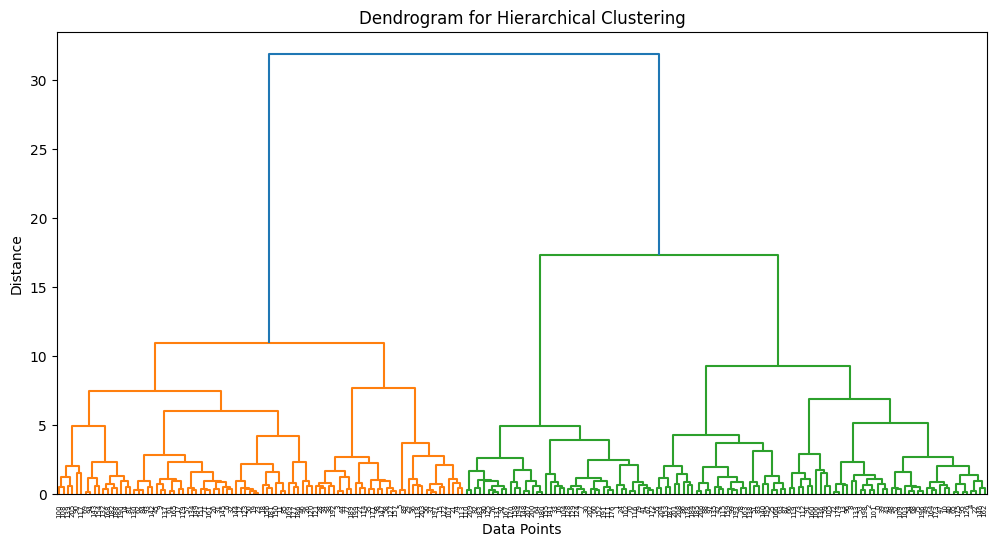

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12, 6))
linked = linkage(df_scaled, method='ward')
dendrogram(linked, truncate_mode='level', p=10)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [88]:
from  sklearn.cluster import AgglomerativeClustering

optimal_clusters_hier = optimal_k  # Use same as K-Means for consistency
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters_hier)
scaled_labels = hierarchical.fit_predict(df_scaled)

In [89]:
scaled_labels

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2], dtype=int64)

In [90]:
evaluate_clustering_model(df_scaled, scaled_labels)

Clustering Evaluation Report
------------------------------
Number of Clusters: 3

Cluster Distribution:
Cluster 0: 92 points (43.81%)
Cluster 1: 75 points (35.71%)
Cluster 2: 43 points (20.48%)

Metrics:
Silhouette Score: 0.3152


{'n_clusters': 3,
 'silhouette_score': 0.3152265959666065,
 'cluster_distribution': array([92, 75, 43], dtype=int64),
 'cluster_details': [{'cluster': 0,
   'size': 92,
   'percentage': 43.80952380952381,
   'centroid': array([-0.92210558, -0.91734223, -0.67692728, -0.85546163,  0.47187526])},
  {'cluster': 1,
   'size': 75,
   'percentage': 35.714285714285715,
   'centroid': array([ 1.15657938,  1.163234  ,  0.54610699,  1.14495845, -0.03878356])},
  {'cluster': 2,
   'size': 43,
   'percentage': 20.476190476190474,
   'centroid': array([-0.04441256, -0.06621081,  0.49579735, -0.16673056, -0.94194785])}]}